In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE
import tensorflow as tf

In [3]:
data = pd.read_csv("./Mushroom_Dataset/mushroom_cleaned.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [5]:
data.head(5)

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [6]:
data.isna().sum()

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

In [7]:
scaler = StandardScaler()
data[['cap-diameter', 'stem-height', 'stem-width', 'season']] = scaler.fit_transform(
    data[['cap-diameter', 'stem-height', 'stem-width', 'season']]
)

In [8]:
data.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,5.403500e+04,54035.000000,54035.000000,54035.000000,5.403500e+04,5.403500e+04,54035.000000,5.403500e+04,54035.000000
mean,8.836582e-17,4.000315,2.142056,7.329509,2.188106e-16,-8.205398e-17,8.418062,-5.259870e-17,0.549181
std,1.000009e+00,2.160505,2.228821,3.200266,1.000009e+00,1.000009e+00,3.262078,1.000009e+00,0.497580
min,-1.576238e+00,0.000000,0.000000,0.000000,-1.165480e+00,-1.344010e+00,0.000000,-3.026239e+00,0.000000
25%,-7.731935e-01,2.000000,0.000000,5.000000,-7.498324e-01,-8.056802e-01,6.000000,-2.084902e-01,0.000000
50%,-1.174201e-01,5.000000,1.000000,8.000000,-2.547224e-01,-1.637766e-01,11.000000,-2.934774e-02,1.000000
75%,5.939273e-01,6.000000,4.000000,10.000000,4.543241e-01,6.034389e-01,11.000000,-2.934774e-02,1.000000
max,3.678285e+00,6.000000,6.000000,11.000000,4.725632e+00,3.219644e+00,12.000000,2.788402e+00,1.000000


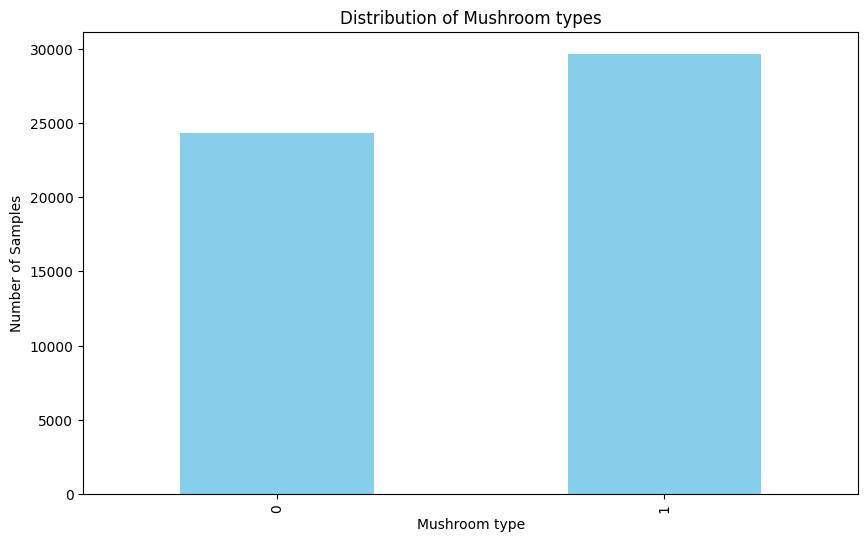

In [9]:
plt.figure(figsize=(10, 6))
data['class'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Mushroom type')
plt.ylabel('Number of Samples')
plt.title('Distribution of Mushroom types')
plt.show()

In [10]:
list(data)

['cap-diameter',
 'cap-shape',
 'gill-attachment',
 'gill-color',
 'stem-height',
 'stem-width',
 'stem-color',
 'season',
 'class']

In [11]:
# Separate features and target
X = data.drop('class', axis=1)
y = data['class'].astype(int)

In [12]:
le = LabelEncoder()
y = le.fit_transform(y)

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y = to_categorical(y)

In [14]:
class_values = data['class'].unique()
print("Class_values:", class_values)
class_len=len(class_values)
print("Class_len:",class_len)
class_counts = data['class'].value_counts()
print(class_counts)

Class_values: [1 0]
Class_len: 2
class
1    29675
0    24360
Name: count, dtype: int64


In [15]:
print(X_scaled.shape)

(54035, 8)


In [16]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42,stratify=y)

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=(X_train.shape[1]), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(class_len, activation='softmax'))

optimizer = Adam(learning_rate=0.0002)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history=model.fit(X_train, y_train, epochs=200, batch_size=64,
                  validation_data=(X_test, y_test),callbacks=[early_stopping])

In [42]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('\nTest accuracy:', accuracy)

338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.9899 - loss: 0.0325

Test accuracy: 0.9901915192604065
